# Data Modified

In [1]:
import pandas as pd 
import numpy as np

dp = pd.read_csv("../screenTime/maps-synthetic-data-v1.1.csv")
dic = pd.read_csv('../screenTime/synthetic_data_dictionary.csv')
dp = pd.DataFrame(dp)
dic = pd.DataFrame(dic)

# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    #change the index name
    missing_data.reset_index(inplace = True)
    missing_data = missing_data.rename(columns = {'index':'variables'})
    return missing_data

# drop variable which has missing values more than 80% 
# df.loc[df[‘column name’] condition]
def drop_missing_75percent_value(df, dic):
    missing_table = draw_missing_data_table(df)
    droped_data = missing_table.loc[missing_table['Percent']>0.80]
    var = list(droped_data['variables'])
    df = df.drop(var,axis=1)
    dic = dic[~dic['Variable Name'].isin(var)]
    return df, dic

dp, dic = drop_missing_75percent_value(dp, dic)
draw_missing_data_table(dp)

# Aged 16 data
# get the train data, where the variables related to 'Aged 198 months' and 'Aged around 15.5 years' children
aged_16_var = dic.loc[(dic['Age of child at administration']=='Aged 198 months') |(dic['Age of child at administration']=='Aged around 15.5 years') ]
X = dp[list(aged_16_var['Variable Name'])]
aged_18_var = dic.loc[dic['Age of child at administration']=='Aged around 17.5 years']
Y = dp[list(aged_18_var['Variable Name'])]

# description of variables
description_X = aged_16_var[['Variable Name', 'Variable Description']]
description_Y = aged_18_var[['Variable Name', 'Variable Description']]

pd.options.mode.chained_assignment = None  # default='warn'
# list of varaibles which has object type
type_label_object = X.select_dtypes(['object']).columns
variable_name = list(type_label_object)
# set type of object variable to 'categroy'
X[variable_name] = X[variable_name].astype('category')
#convert category to numbers[0,1,2,3...], and NA->-1
for i in X.columns:
    if str(X[i].dtype)=='category':
        X[i] = pd.factorize(X[i])[0]
        
# Turn -1 back to NA
X[X==-1] = np.nan

Y['has_dep_diag'] = Y['has_dep_diag'].astype('category')
Y['has_dep_diag'] = pd.factorize(Y['has_dep_diag'])[0]
Y[Y==-1] = np.nan

In [2]:
X

,alon_week,alon_wend,anx_band_15,child_bull,comp_week,comp_wend,dep_band_15,draw_week,draw_wend,exercise,...,talk_phon_week,talk_phon_wend,text_wend,tran_week,tran_wend,tv_week,tv_wend,weight_16,work_week,work_wend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.294132,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.812426,NaN,NaN
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,62.270030,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,0.0,1.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0
13731,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,...,1.0,0.0,3.0,1.0,1.0,1.0,1.0,58.075832,2.0,2.0
13732,2.0,0.0,NaN,0.0,2.0,0.0,NaN,2.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,2.0,NaN,2.0,1.0


In [3]:
Y

,dep_score,has_dep_diag,panic_score,prim_diag,secd_diag
0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13729,NaN,NaN,NaN,NaN,NaN
13730,NaN,NaN,NaN,NaN,NaN
13731,NaN,NaN,NaN,NaN,NaN
13732,0.0,0.0,0.0,0.0,0.0


# Data Validation
### 1. missing value validation 
### 2. data type validation
### 3. data range validation (similar to check outliers, I willl find another method to check outliers)

Parsing refers to converting data to a specific data.
Validation refers to checking if a given input is of a certain type type.

In [4]:
def check_missing_data(df):
    for col in df.columns:
        miss = df[col].isnull().sum()
        if miss>0:
            print("{} has {} missing value(s)".format(col,miss))
        else:
            print("{} has NO missing value!".format(col))

check_missing_data(X)

alon_week has 8726 missing value(s)
alon_wend has 8884 missing value(s)
anx_band_15 has 8431 missing value(s)
child_bull has 8745 missing value(s)
comp_week has 8723 missing value(s)
comp_wend has 8895 missing value(s)
dep_band_15 has 8435 missing value(s)
draw_week has 8722 missing value(s)
draw_wend has 8892 missing value(s)
exercise has 8763 missing value(s)
height_16 has 8370 missing value(s)
musi_week has 8731 missing value(s)
musi_wend has 8903 missing value(s)
out_sum_week has 8720 missing value(s)
out_sum_wend has 8912 missing value(s)
out_win_week has 8727 missing value(s)
out_win_wend has 8885 missing value(s)
play_week has 8719 missing value(s)
play_wend has 8884 missing value(s)
read_week has 8741 missing value(s)
read_wend has 8900 missing value(s)
talk_mob_week has 8718 missing value(s)
talk_mob_wend has 8900 missing value(s)
talk_phon_week has 8735 missing value(s)
talk_phon_wend has 8884 missing value(s)
text_wend has 8893 missing value(s)
tran_week has 8710 missing val

In [5]:
import pandas as pd
import pandas_schema
from pandas_schema import Column
from pandas_schema.validation import CustomElementValidation
import numpy as np
from decimal import *

def check_decimal(dec):
    try:
        Decimal(dec)
    except InvalidOperation:
        return False
    return True


def check_int(num):
    try:
        int(num)
    except ValueError:
        return False
    return True

def check_float(num):
    try:
        float(num)
    except ValueError:
        return False
    return True

def check_nan(num):
    try:
        np.isnan(num)
    except ValueError:
        return False
    return True

# define validation elements
decimal_validation = [CustomElementValidation(lambda d: check_decimal(d), 'is not decimal')]
int_validation = [CustomElementValidation(lambda i: check_int(i), 'is not integer')]
float_validation = [CustomElementValidation(lambda i: check_float(i), 'is not float')]
null_validation = [CustomElementValidation(lambda d: pd.notnull(d), 'this field cannot be null')]


# validation for 16_age_varaibles
def do_X_validation(data):
    
    # define validation schema
    schema = pandas_schema.Schema([
            Column('alon_week', decimal_validation + null_validation),
            Column('alon_wend', decimal_validation + null_validation),
            Column('anx_band_15', decimal_validation + null_validation),
            Column('child_bull', decimal_validation + null_validation),
            Column('comp_week', decimal_validation + null_validation),
            Column('comp_wend', decimal_validation + null_validation),
            Column('dep_band_15', decimal_validation + null_validation),
            Column('draw_week', decimal_validation + null_validation),
            Column('draw_wend', decimal_validation + null_validation),
            Column('exercise', decimal_validation + null_validation),           
            Column('musi_week', decimal_validation + null_validation),
            Column('musi_wend', decimal_validation + null_validation),
            Column('out_sum_week', decimal_validation + null_validation),
            Column('out_sum_wend', decimal_validation + null_validation),
            Column('out_win_week', decimal_validation + null_validation),
            Column('out_win_wend', decimal_validation + null_validation),
            Column('play_week', decimal_validation + null_validation),
            Column('play_wend', decimal_validation + null_validation),
            Column('read_week', decimal_validation + null_validation),
            Column('read_wend', decimal_validation + null_validation),
            Column('talk_mob_week', decimal_validation + null_validation),
            Column('talk_mob_wend', decimal_validation + null_validation),
            Column('talk_phon_week', decimal_validation + null_validation),
            Column('talk_phon_wend', decimal_validation + null_validation),
            Column('text_wend', decimal_validation + null_validation),
            Column('tran_week', decimal_validation + null_validation),
            Column('tran_wend', decimal_validation + null_validation),
            Column('tv_week', decimal_validation + null_validation),
            Column('tv_wend', decimal_validation + null_validation),
            Column('work_week', decimal_validation + null_validation),
            Column('work_wend',  decimal_validation + null_validation),

            Column('weight_16',decimal_validation + null_validation),
            Column('height_16', decimal_validation + null_validation)])
    
    # apply validation
    errors_X = schema.validate(data)
    errors_index_rows_X = [e.row for e in errors_X]
    data_clean_X = data.drop(index=errors_index_rows_X)

    # save data
    pd.DataFrame({'col':errors_X}).to_csv('errors_X.csv')
    data_clean_X.to_csv('clean_X_data.csv')

do_X_validation(X)

In [6]:
Y.columns

Index(['dep_score', 'has_dep_diag', 'panic_score', 'prim_diag', 'secd_diag'], dtype='object')

In [7]:
Y.dtypes

dep_score       float64
has_dep_diag    float64
panic_score     float64
prim_diag       float64
secd_diag       float64
dtype: object

In [8]:
# validation for 18_age_variables
def do_Y_validation(data):
    schema = pandas_schema.Schema([
        Column('dep_score', decimal_validation + null_validation),
        Column('has_dep_diag', decimal_validation + null_validation),
        Column('prim_diag', decimal_validation + null_validation),
        Column('secd_diag', decimal_validation + null_validation),
        Column('work_wend',  decimal_validation + null_validation)
    ])
    
    # apply validation
    errors_Y = schema.validate(data)
    errors_index_rows_Y = [e.row for e in errors_Y]
    
    # filter index >= 0
    errors_index_rows_Y = list(filter(lambda errors_index_rows_Y: errors_index_rows_Y >= 0, errors_index_rows_Y))
    data_clean_Y = data.drop(index=errors_index_rows_Y)

    # save data
    pd.DataFrame({'col':errors_Y}).to_csv('errors_Y.csv')
    data_clean_Y.to_csv('clean_Y_data.csv')

do_Y_validation(Y)


# Handling outliers(Univariate outliers)

visualization


In [2]:
#Load libraries
import pandas.util.testing as tm
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#Load data
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

In [6]:

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


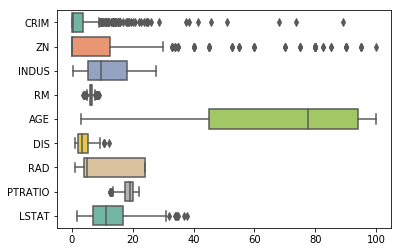

In [8]:
df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")


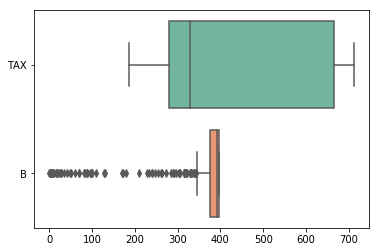

In [7]:
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

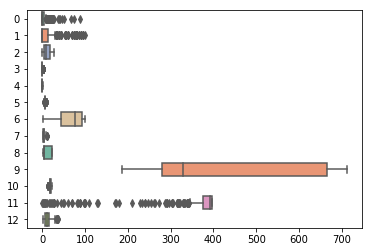

In [13]:
ax= sns.boxplot(data=X, orient="h", palette="Set2")